In [32]:
# Import Libraries
# Numerical
import numpy as np
import pandas as pd

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import LabelEncoder

### Pre-defined Functions

In [2]:
def pie_subplots(data_df):
    # Define the layout of subplots
    # Determine the number of subplot rows/columns needed
    num_columns = len(data_df.columns)
    # For simplicity, creating a square layout or as close to square as possible
    n_cols = int(np.ceil(np.sqrt(num_columns)))
    n_rows = int(np.ceil(num_columns / n_cols))

    # Creating the figure and axes for subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7*n_rows, 3*n_cols))

    # Iterate over each column to plot
    for i, column in enumerate(data_df.columns):
        # Aggregate data
        data = data_df[column].value_counts()
    
        # Check if axes is a single-dimensional array
        if n_rows == 1 or n_cols == 1:
            ax = axes[i]
        else:
            # For a 2D array of subplots, index with row and column
            row, col = i // n_cols, i % n_cols
            ax = axes[row, col]
    
        # Plot pie chart on the correct axis
        ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Pie Chart for {column}')

    plt.tight_layout()
    plt.show()


## 1.0 Load Datasets

In [3]:
data_key = pd.read_csv("data/QUESTION_KEY.csv")
data_key.head()

,Question Order,Question,Survey Section,Question Type,Answer Choices,Notes
0,1,What is your age?,Background Information,Single select,"<18 years old, 18-24, 25-34, 35-44, 45-54, 55-...",NaN
1,2,How many cups of coffee do you typically drink...,Background Information,Single select,"Less than 1, 1, 2, 3, 4, More than 4",NaN
2,3,Where do you typically drink coffee?,Background Information,Multiple selection,"None of these, At home, At a cafe, On the go, ...",NaN
3,4,"On the go, where do you typically purchase cof...",Background Information,Multiple selection,"Other, Drive-thru, Specialty coffee shop, Nati...","Only available if ""On the go"" was selected in ..."
4,5,Where else do you purchase coffee?,Background Information,Text,NaN,"Only available if ""Other"" was selected in ques..."


In [4]:
data = pd.read_csv("data/GACTT_RESULTS_ANONYMIZED_v2.csv", sep=',')
data.head()

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,...,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Education Level,Ethnicity/Race,Employment Status,Number of Children,Political Affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.0 Data Exploration

In [5]:
data_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Question Order  56 non-null     int64 
 1   Question        56 non-null     object
 2   Survey Section  56 non-null     object
 3   Question Type   56 non-null     object
 4   Answer Choices  46 non-null     object
 5   Notes           10 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 111 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(90)
memory usage: 3.4+ MB


Separate data into participant deomgraphics, basic survey info, and coffee related info

In [7]:
desc_columns = [1,2, 89, 105, 106, 107, 108, 109, 110]
desc_df = data.iloc[:, desc_columns]
survey_columns = [20, 29, 65, 66, 67, 68, 69, 90, 98, 99, 100, 101, 102, 103, 104]
survey_df = data.iloc[:, survey_columns]
survey_enc_columns = [3,9,21,31, 38, 48,57,91]
coffee_survey_df = data.iloc[:, survey_enc_columns + survey_enc_columns]

### 2.1A Participant Descriptive Information

In [8]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   What is your age?                                        4011 non-null   object
 1   How many cups of coffee do you typically drink per day?  3949 non-null   object
 2   Do you work from home or in person?                      3524 non-null   object
 3   Gender                                                   3523 non-null   object
 4   Education Level                                          3438 non-null   object
 5   Ethnicity/Race                                           3418 non-null   object
 6   Employment Status                                        3419 non-null   object
 7   Number of Children                                       856 non-null    object
 8   Political Affiliation                  

In [9]:
desc_df.describe().T

,count,unique,top,freq
What is your age?,4011,7,25-34 years old,1986
How many cups of coffee do you typically drink per day?,3949,6,2,1663
Do you work from home or in person?,3524,3,I primarily work from home,1592
Gender,3523,5,Male,2524
Education Level,3438,6,Bachelor's degree,1759
Ethnicity/Race,3418,6,White/Caucasian,2626
Employment Status,3419,6,Employed full-time,2708
Number of Children,856,4,2,402
Political Affiliation,3289,4,Democrat,1768


### 2.1A Data Cleaning

- Deal with Missing Values 
- Checking for Duplicates
- changing object formatted columns to Int


In [17]:
# The Number of Children column (7) has the most nulls
desc_df.iloc[:,7].value_counts()

Number of Children
2              402
1              310
3               92
More than 3     52
Name: count, dtype: int64

Since not having any children is not listed in the value counts, then it makes sense to replace the null values in the column with 0.  

In [18]:
desc_df.iloc[:,7].fillna(0, inplace=True)
desc_df.iloc[:,7].value_counts()

Number of Children
0              3186
2               402
1               310
3                92
More than 3      52
Name: count, dtype: int64

In [19]:
# The Political Afficiliation column (8) has the second most nulls
desc_df.iloc[:,8].value_counts()

Political Affiliation
Democrat          1768
No affiliation     826
Independent        507
Republican         188
Name: count, dtype: int64

In [27]:
d_df = desc_df.dropna().reset_index()
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   index                                                    3221 non-null   int64 
 1   What is your age?                                        3221 non-null   object
 2   How many cups of coffee do you typically drink per day?  3221 non-null   object
 3   Do you work from home or in person?                      3221 non-null   object
 4   Gender                                                   3221 non-null   object
 5   Education Level                                          3221 non-null   object
 6   Ethnicity/Race                                           3221 non-null   object
 7   Employment Status                                        3221 non-null   object
 8   Number of Children                    

In [28]:
# Checking for duplicates
d_df.duplicated().sum()

0

In [30]:
d_df['Gender'].value_counts()

Gender
Male                 2342
Female                754
Non-binary             98
Prefer not to say      18
Other                   9
Name: count, dtype: int64

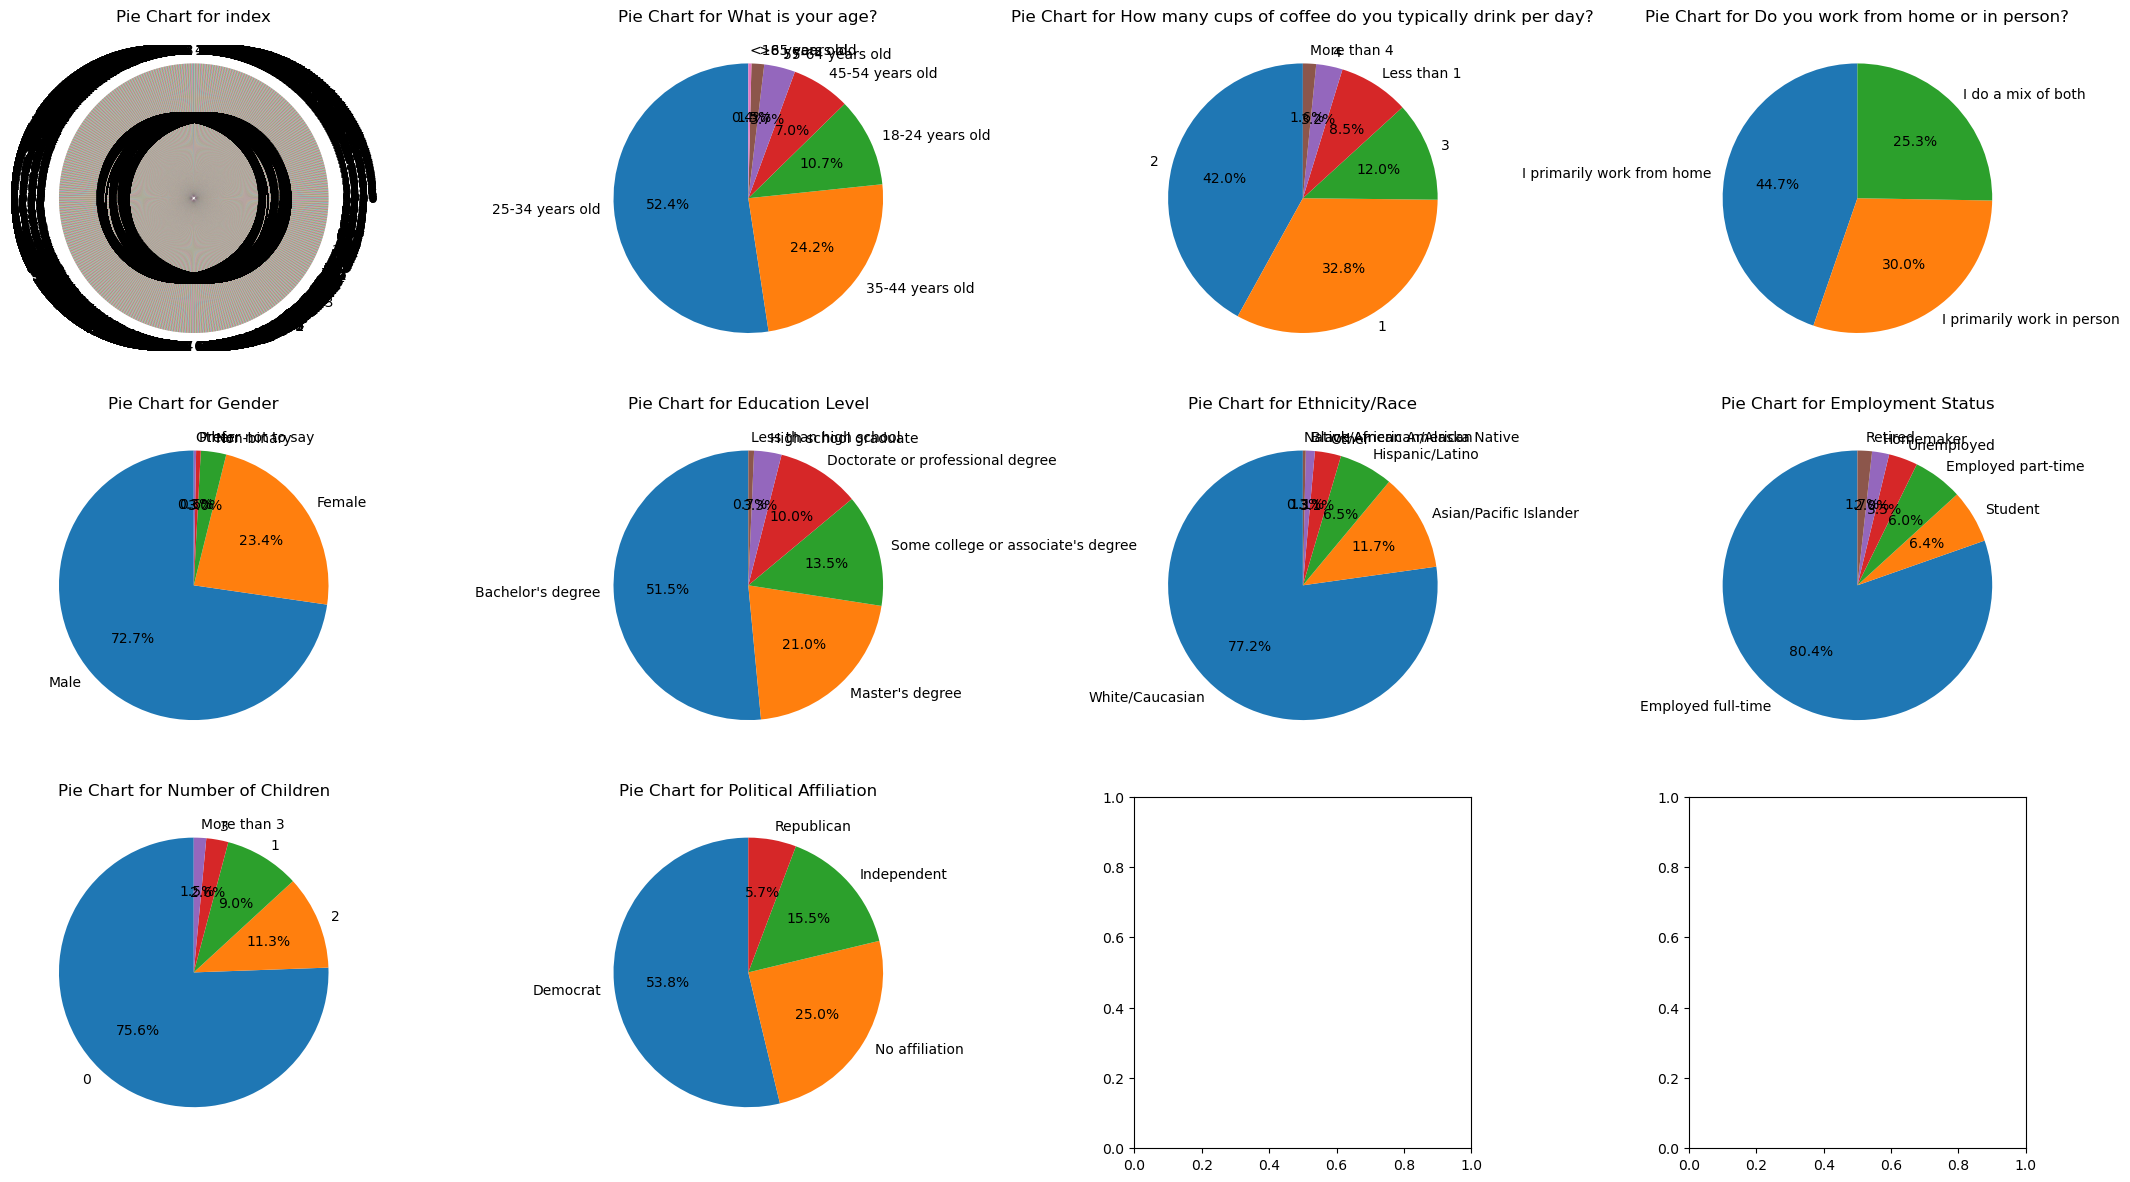

In [31]:
pie_subplots(d_df)

Since each column has between 3 and 7 different entry options, I will apply a label encoding for each of the columns


In [34]:
d_df.iloc[:,1].value_counts()

What is your age?
25-34 years old    1688
35-44 years old     781
18-24 years old     344
45-54 years old     227
55-64 years old     120
>65 years old        49
<18 years old        12
Name: count, dtype: int64

In [35]:
le = LabelEncoder()
d_df['le_Age'] = le.fit_transform(d_df.iloc[:,1])
d_df['le_Age'].value_counts()

Age
1    1688
2     781
0     344
3     227
4     120
6      49
5      12
Name: count, dtype: int64

In [37]:
test_age = le.inverse_transform(d_df['Age'])
test_age

array(['<18 years old', '25-34 years old', '45-54 years old', ...,
       '18-24 years old', '25-34 years old', '25-34 years old'],
      dtype=object)

In [38]:
d_df.columns

Index(['index', 'What is your age?',
       'How many cups of coffee do you typically drink per day?',
       'Do you work from home or in person?', 'Gender', 'Education Level',
       'Ethnicity/Race', 'Employment Status', 'Number of Children',
       'Political Affiliation', 'Age'],
      dtype='object')

In [39]:
d_df.iloc[:,2].value_counts()

How many cups of coffee do you typically drink per day?
2              1352
1              1058
3               385
Less than 1     273
4               102
More than 4      51
Name: count, dtype: int64

In [42]:
d_df['CoffeeCups'] = d_df.iloc[:,2].map({"Less than 1":0, "1":1, "2":2, "3":3, "4":4, "More than 4":5})
d_df['CoffeeCups'].value_counts()

CoffeeCups
2    1352
1    1058
3     385
0     273
4     102
5      51
Name: count, dtype: int64

In [43]:
d_df.iloc[:,3].value_counts()

Do you work from home or in person?
I primarily work from home    1440
I primarily work in person     967
I do a mix of both             814
Name: count, dtype: int64

In [44]:
d_df['WorkLocation'] = le.fit_transform(d_df.iloc[:,3])
d_df['WorkLocation'].value_counts()

WorkLocation
1    1440
2     967
0     814
Name: count, dtype: int64

In [45]:
d_df['Gender'].value_counts()

Gender
Male                 2342
Female                754
Non-binary             98
Prefer not to say      18
Other                   9
Name: count, dtype: int64

In [46]:
d_df['le_Gender'] = le.fit_transform(d_df.iloc[:,4])
d_df['le_Gender'].value_counts()

le_Gender
1    2342
0     754
2      98
4      18
3       9
Name: count, dtype: int64

In [47]:
d_df['Education Level'].value_counts()

Education Level
Bachelor's degree                     1659
Master's degree                        678
Some college or associate's degree     435
Doctorate or professional degree       321
High school graduate                   106
Less than high school                   22
Name: count, dtype: int64

In [49]:
d_df['le_HighestEducation'] = le.fit_transform(d_df.iloc[:,5])
d_df['le_HighestEducation'].value_counts()

HighestEducation
0    1659
4     678
5     435
1     321
2     106
3      22
Name: count, dtype: int64

In [51]:
d_df['Ethnicity/Race'].value_counts()

Ethnicity/Race
White/Caucasian                  2487
Asian/Pacific Islander            378
Hispanic/Latino                   209
Other                             101
Black/African American             35
Native American/Alaska Native      11
Name: count, dtype: int64

In [52]:
d_df['le_Race']=le.fit_transform(d_df.iloc[:,6])
d_df['le_Race'].value_counts()

le_Race
5    2487
0     378
2     209
4     101
1      35
3      11
Name: count, dtype: int64

In [53]:
d_df['Employment Status'].value_counts()

Employment Status
Employed full-time    2589
Student                206
Employed part-time     192
Unemployed             112
Homemaker               66
Retired                 56
Name: count, dtype: int64

In [54]:
d_df['le_Employment'] = le.fit_transform(d_df.iloc[:,7])
d_df['le_Employment'].value_counts()

le_Employment
0    2589
4     206
1     192
5     112
2      66
3      56
Name: count, dtype: int64

In [65]:
d_df['Children'] = d_df.iloc[:,8].map({"0":0, "1":1, "2":2, "3":3, "More than 3":4})
d_df['Children'].value_counts()

Children
2.0    363
1.0    291
3.0     85
4.0     48
Name: count, dtype: int64

In [64]:
d_df['Children'] = d_df['Children'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [58]:
d_df['Political Affiliation'].value_counts()

Political Affiliation
Democrat          1732
No affiliation     805
Independent        499
Republican         185
Name: count, dtype: int64

In [59]:
d_df['PoliticalParty']=le.fit_transform(d_df.iloc[:, 9])
d_df['PoliticalParty'].value_counts()

PoliticalParty
0    1732
2     805
1     499
3     185
Name: count, dtype: int64

In [60]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   index                                                    3221 non-null   int64  
 1   What is your age?                                        3221 non-null   object 
 2   How many cups of coffee do you typically drink per day?  3221 non-null   object 
 3   Do you work from home or in person?                      3221 non-null   object 
 4   Gender                                                   3221 non-null   object 
 5   Education Level                                          3221 non-null   object 
 6   Ethnicity/Race                                           3221 non-null   object 
 7   Employment Status                                        3221 non-null   object 
 8   Number of Children          

In [67]:
df = d_df.iloc[:, 10:]

## 2.1B Survey Results

In [68]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 15 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   How else do you brew coffee at home?                                                              678 non-null    object 
 1   What is your favorite coffee drink?                                                               3980 non-null   object 
 2   Before today's tasting, which of the following best described what kind of coffee you like?       3958 non-null   object 
 3   How strong do you like your coffee?                                                               3916 non-null   object 
 4   What roast level of coffee do you prefer?                                                         3940 non-null   object 
 5  

In [69]:
s_df=survey_df.iloc[:,1:].dropna()
s_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374 entries, 34 to 4041
Data columns (total 14 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   What is your favorite coffee drink?                                                               3374 non-null   object 
 1   Before today's tasting, which of the following best described what kind of coffee you like?       3374 non-null   object 
 2   How strong do you like your coffee?                                                               3374 non-null   object 
 3   What roast level of coffee do you prefer?                                                         3374 non-null   object 
 4   How much caffeine do you like in your coffee?                                                     3374 non-null   object 
 5   Las

In [77]:
s_df.iloc[:, 0].value_counts()

What is your favorite coffee drink?
Pourover                            928
Latte                               582
Regular drip coffee                 358
Cappuccino                          294
Espresso                            279
Cortado                             267
Americano                           216
Iced coffee                         130
Mocha                                99
Other                                94
Cold brew                            89
Blended drink (e.g. Frappuccino)     38
Name: count, dtype: int64

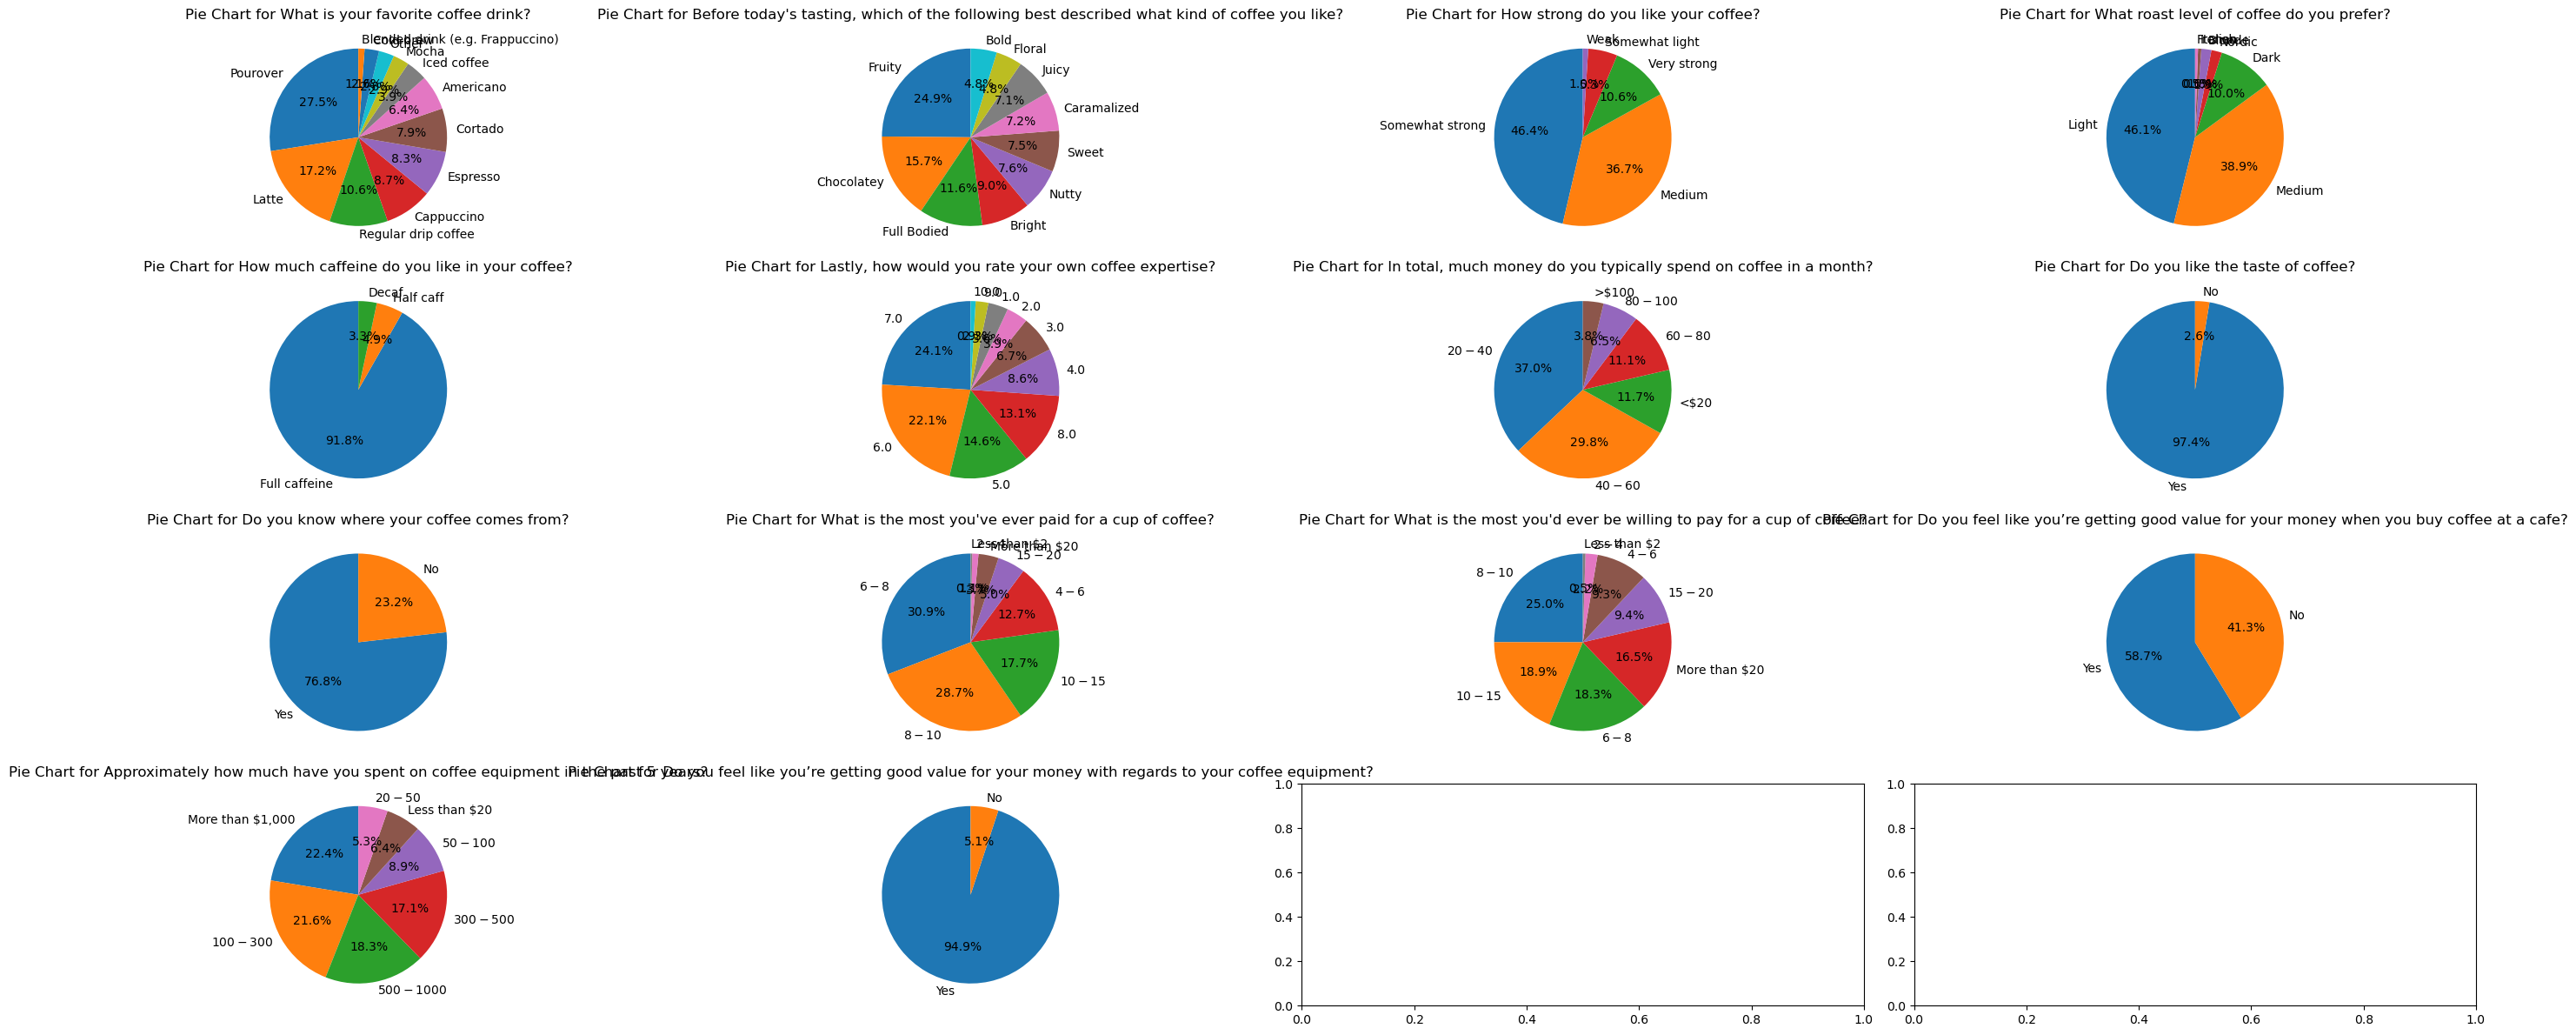

In [70]:
pie_subplots(s_df)

In [78]:
s_df['FavoriteDrink']=le.fit_transform(s_df.iloc[:, 0])
s_df['FavoriteDrink'].value_counts()

FavoriteDrink
10    928
7     582
11    358
2     294
5     279
4     267
0     216
6     130
8      99
9      94
3      89
1      38
Name: count, dtype: int64

In [79]:
s_df.iloc[:, 1].value_counts()

Before today's tasting, which of the following best described what kind of coffee you like?
Fruity         839
Chocolatey     530
Full Bodied    390
Bright         302
Nutty          258
Sweet          252
Caramalized    242
Juicy          239
Floral         161
Bold           161
Name: count, dtype: int64

In [80]:
s_df['Pre_PreferredCoffee']=le.fit_transform(s_df.iloc[:, 1])
s_df['Pre_PreferredCoffee'].value_counts()

Pre_PreferredCoffee
5    839
3    530
6    390
1    302
8    258
9    252
2    242
7    239
4    161
0    161
Name: count, dtype: int64

In [81]:
s_df.iloc[:, 2].value_counts()

How strong do you like your coffee?
Somewhat strong    1564
Medium             1238
Very strong         359
Somewhat light      180
Weak                 33
Name: count, dtype: int64

In [82]:
s_df['CoffeeStrength']=le.fit_transform(s_df.iloc[:, 2])
s_df['CoffeeStrength'].value_counts()

CoffeeStrength
2    1564
0    1238
3     359
1     180
4      33
Name: count, dtype: int64

In [83]:
s_df.iloc[:, 3].value_counts()

What roast level of coffee do you prefer?
Light      1557
Medium     1313
Dark        339
Nordic       65
Blonde       62
Italian      20
French       18
Name: count, dtype: int64

In [85]:
s_df['CoffeeRoast']=le.fit_transform(s_df.iloc[:, 3])
s_df['CoffeeRoast'].value_counts()

CoffeeRoast
4    1557
5    1313
1     339
6      65
0      62
3      20
2      18
Name: count, dtype: int64

In [86]:
s_df.iloc[:, 4].value_counts()

How much caffeine do you like in your coffee?
Full caffeine    3096
Half caff         165
Decaf             113
Name: count, dtype: int64

In [87]:
s_df['CaffeineLevel']=le.fit_transform(s_df.iloc[:, 4])
s_df['CaffeineLevel'].value_counts()

CaffeineLevel
1    3096
2     165
0     113
Name: count, dtype: int64

In [89]:
s_df.iloc[:, 6].value_counts()

In total, much money do you typically spend on coffee in a month?
$20-$40     1250
$40-$60     1007
<$20         396
$60-$80      375
$80-$100     219
>$100        127
Name: count, dtype: int64

In [90]:
s_df['CoffeeSpend']=le.fit_transform(s_df.iloc[:, 6])
s_df['CoffeeSpend'].value_counts()

CoffeeSpend
0    1250
1    1007
4     396
2     375
3     219
5     127
Name: count, dtype: int64

In [91]:
s_df.iloc[:, 9].value_counts()

What is the most you've ever paid for a cup of coffee?
$6-$8            1042
$8-$10            967
$10-$15           596
$4-$6             427
$15-$20           170
More than $20     124
$2-$4              38
Less than $2       10
Name: count, dtype: int64

In [92]:
s_df['HighestCoffeeSpend']=le.fit_transform(s_df.iloc[:, 9])
s_df['HighestCoffeeSpend'].value_counts()

HighestCoffeeSpend
4    1042
5     967
0     596
3     427
1     170
7     124
2      38
6      10
Name: count, dtype: int64

In [93]:
s_df.iloc[:, 10].value_counts()

What is the most you'd ever be willing to pay for a cup of coffee?
$8-$10           843
$10-$15          636
$6-$8            618
More than $20    556
$15-$20          316
$4-$6            315
$2-$4             74
Less than $2      16
Name: count, dtype: int64

In [94]:
s_df['Willing_HighestCoffeeSpend']=le.fit_transform(s_df.iloc[:, 10])
s_df['Willing_HighestCoffeeSpend'].value_counts()

Willing_HighestCoffeeSpend
5    843
0    636
4    618
7    556
1    316
3    315
2     74
6     16
Name: count, dtype: int64

In [95]:
s_df.iloc[:, 12].value_counts()

Approximately how much have you spent on coffee equipment in the past 5 years?
More than $1,000    756
$100-$300           728
$500-$1000          618
$300-$500           576
$50-$100            301
Less than $20       215
$20-$50             180
Name: count, dtype: int64

In [96]:
s_df['CoffeeEquipmentSpend']=le.fit_transform(s_df.iloc[:, 12])
s_df['CoffeeEquipmentSpend'].value_counts()

CoffeeEquipmentSpend
6    756
0    728
4    618
2    576
3    301
5    215
1    180
Name: count, dtype: int64

In [73]:
# Convert Yes No questions into 0s and 1s
yes_no_cols = [7,8,11,13]
yes_no_new_names = ["CoffeeTest","CoffeeFrom", "CafeCoffeeValue", "EquipCoffeeValue"]
for i in range(0, len(yes_no_cols)):
    s_df[yes_no_new_names[i]] = s_df.iloc[:,yes_no_cols[i]].map({"No":0, "Yes":1})

In [76]:
s_df[yes_no_new_names].describe().T

,count,mean,std,min,25%,50%,75%,max
CoffeeTest,3374.0,0.973918,0.159402,0.0,1.0,1.0,1.0,1.0
CoffeeFrom,3374.0,0.768228,0.422027,0.0,1.0,1.0,1.0,1.0
CafeCoffeeValue,3374.0,0.587137,0.492422,0.0,0.0,1.0,1.0,1.0
EquipCoffeeValue,3374.0,0.949318,0.219379,0.0,1.0,1.0,1.0,1.0


### Convert the Object columns to Int columns using the Label Encoder

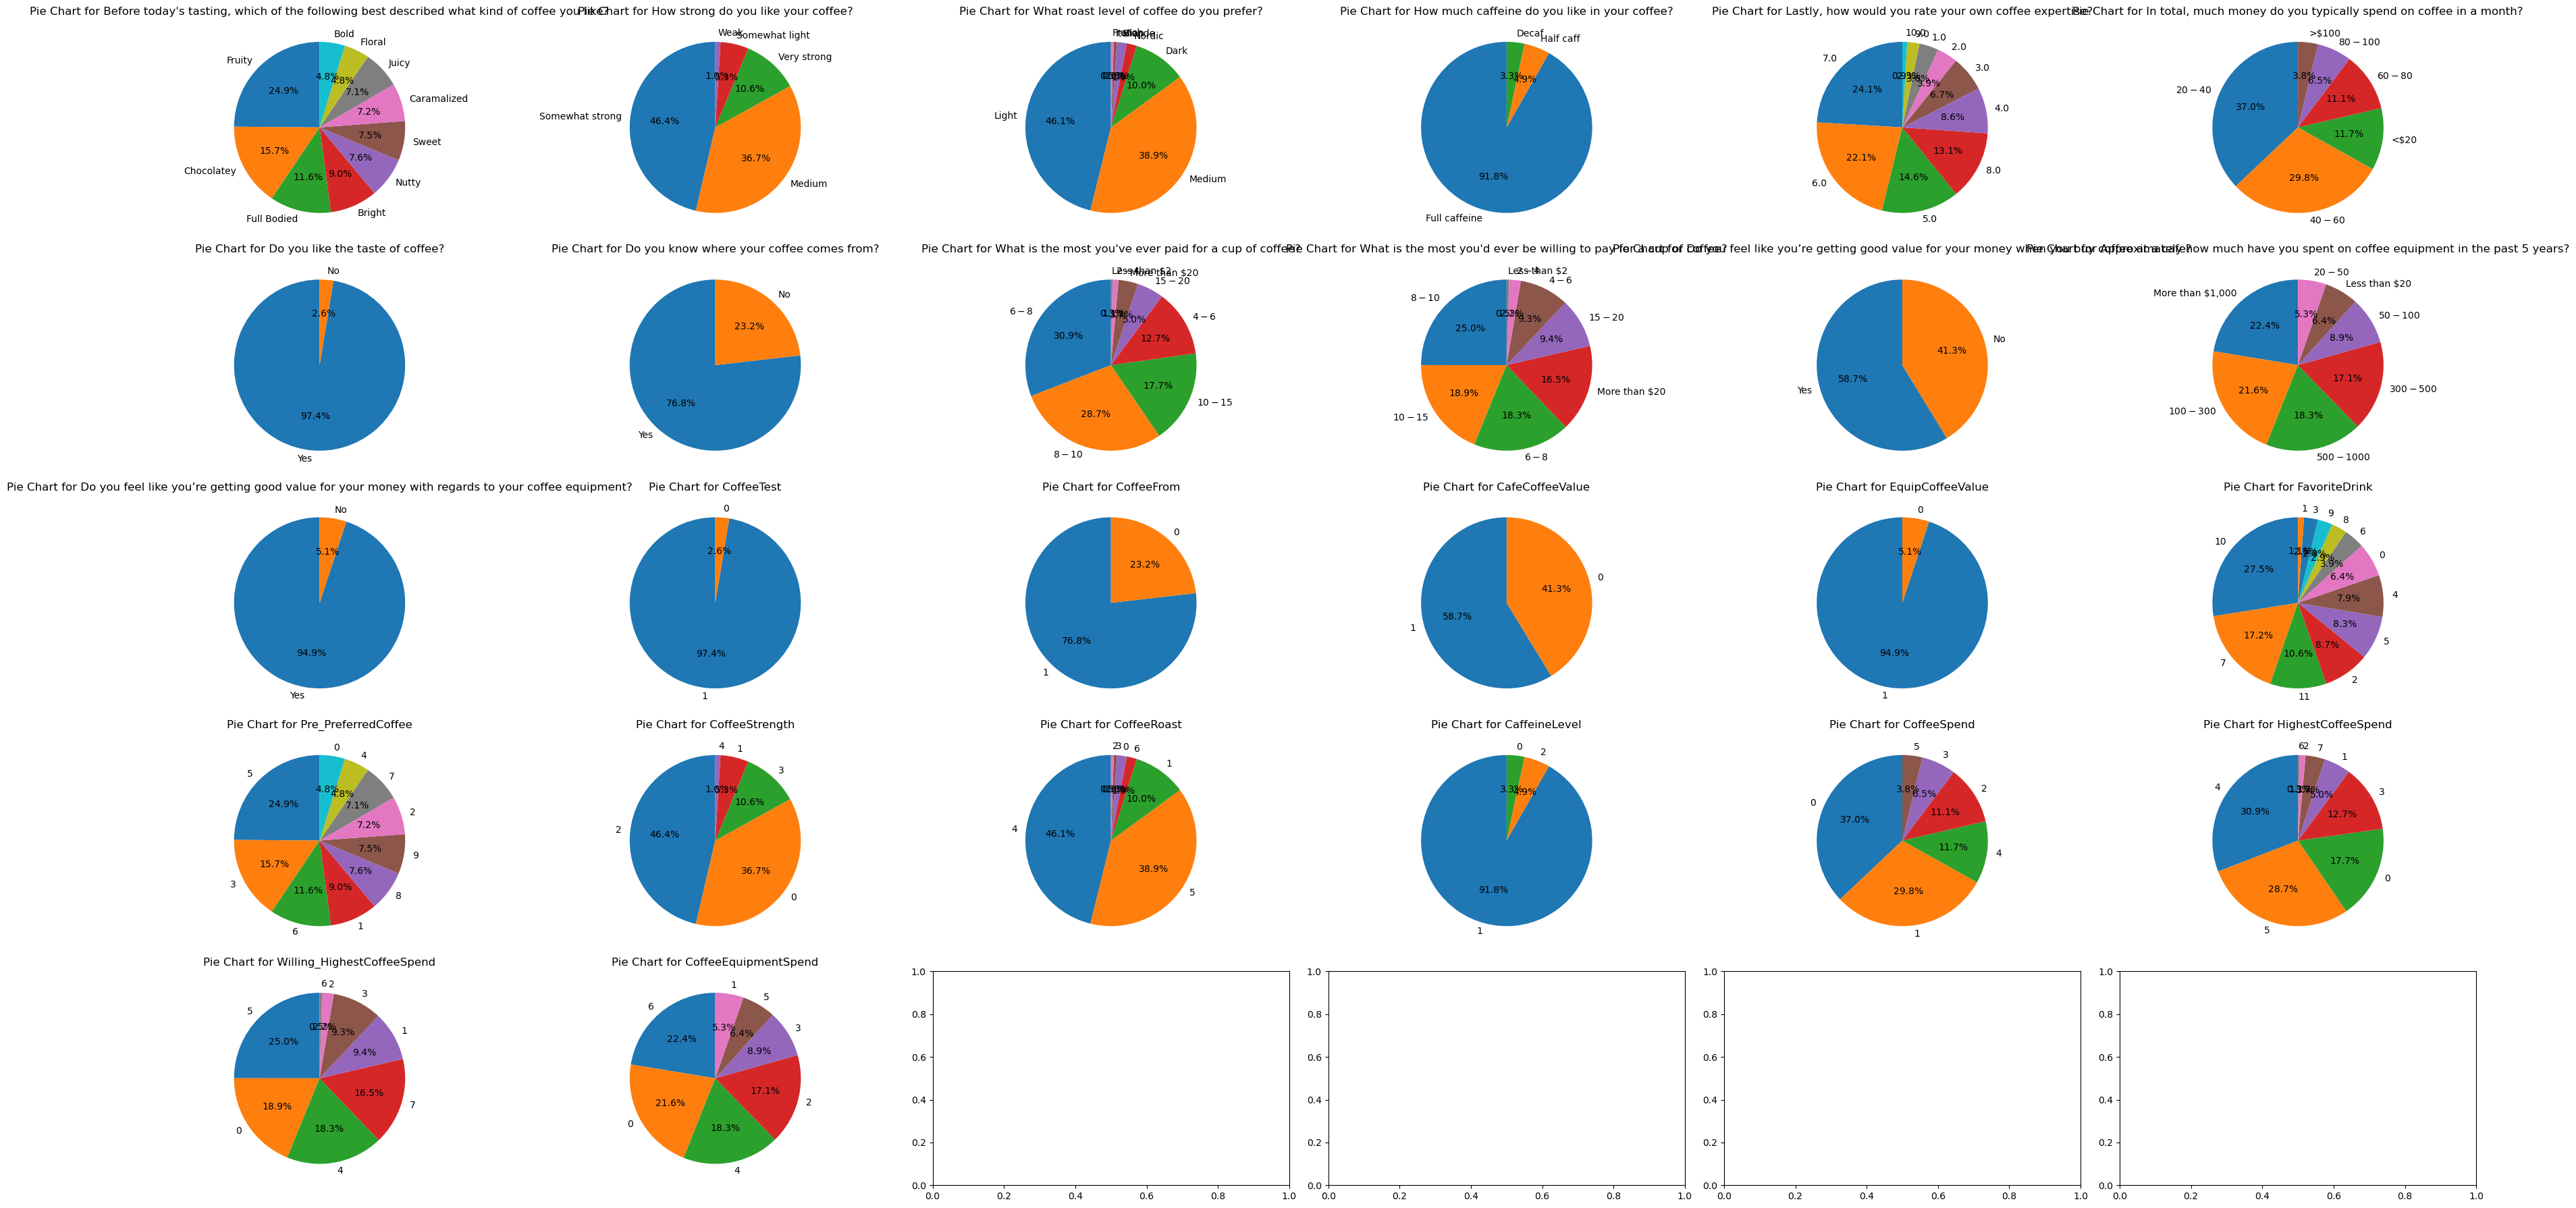

In [99]:
pie_subplots(s_df.iloc[:,1:])

In [102]:
s_df['CoffeeExpertiseRating']=s_df.iloc[:,5]
s_df.iloc[:,14:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374 entries, 34 to 4041
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CoffeeTest                  3374 non-null   int64  
 1   CoffeeFrom                  3374 non-null   int64  
 2   CafeCoffeeValue             3374 non-null   int64  
 3   EquipCoffeeValue            3374 non-null   int64  
 4   FavoriteDrink               3374 non-null   int32  
 5   Pre_PreferredCoffee         3374 non-null   int32  
 6   CoffeeStrength              3374 non-null   int32  
 7   CoffeeRoast                 3374 non-null   int32  
 8   CaffeineLevel               3374 non-null   int32  
 9   CoffeeSpend                 3374 non-null   int32  
 10  HighestCoffeeSpend          3374 non-null   int32  
 11  Willing_HighestCoffeeSpend  3374 non-null   int32  
 12  CoffeeEquipmentSpend        3374 non-null   int32  
 13  CoffeeExpertiseRating       3374 non-

In [103]:
df_2 = s_df.iloc[:,14:]

<Axes: >

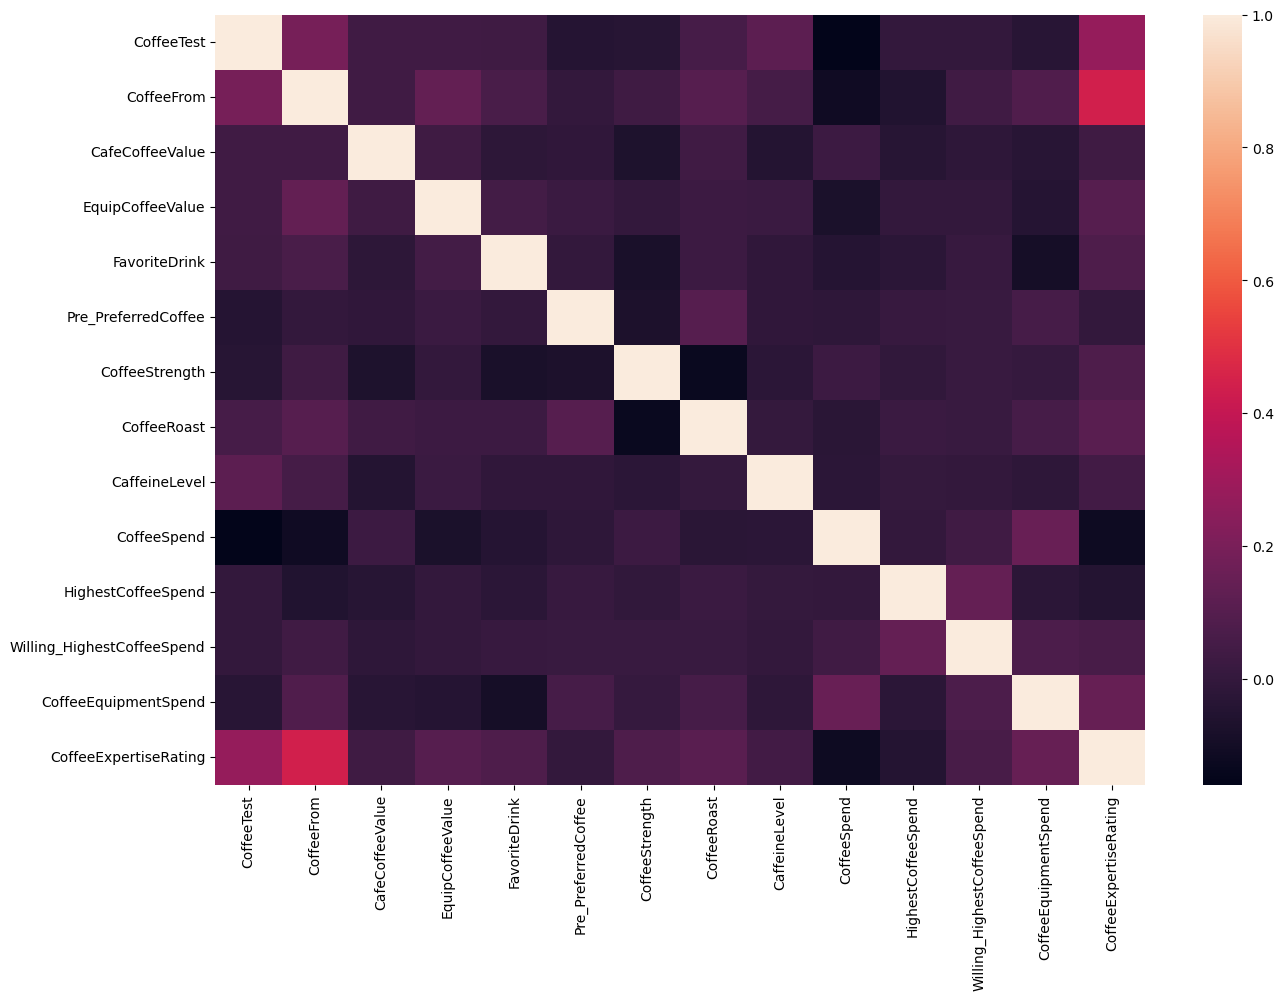

In [105]:
survey_corr = df_2.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_2.corr())

In [106]:
survey_corr

,CoffeeTest,CoffeeFrom,CafeCoffeeValue,EquipCoffeeValue,FavoriteDrink,Pre_PreferredCoffee,CoffeeStrength,CoffeeRoast,CaffeineLevel,CoffeeSpend,HighestCoffeeSpend,Willing_HighestCoffeeSpend,CoffeeEquipmentSpend,CoffeeExpertiseRating
CoffeeTest,1.000000,0.192166,0.036517,0.038490,0.032668,-0.044630,-0.038892,0.053181,0.119093,-0.159754,-0.002079,-0.005357,-0.034788,0.274122
CoffeeFrom,0.192166,1.000000,0.038720,0.135667,0.062947,-0.003026,0.033522,0.102793,0.051589,-0.113613,-0.057700,0.035190,0.084654,0.440652
CafeCoffeeValue,0.036517,0.038720,1.000000,0.031288,-0.022870,-0.011440,-0.068463,0.035822,-0.049420,0.022339,-0.040415,-0.017517,-0.036928,0.033722
EquipCoffeeValue,0.038490,0.135667,0.031288,1.000000,0.044215,0.018419,-0.004961,0.025132,0.017138,-0.076562,-0.005110,-0.003171,-0.045788,0.102215
FavoriteDrink,0.032668,0.062947,-0.022870,0.044215,1.000000,-0.004192,-0.080835,0.025797,-0.014779,-0.044390,-0.027935,0.009251,-0.095278,0.078171
Pre_PreferredCoffee,-0.044630,-0.003026,-0.011440,0.018419,-0.004192,1.000000,-0.070067,0.100634,-0.013342,-0.015526,0.009337,0.014851,0.053303,-0.003425
CoffeeStrength,-0.038892,0.033522,-0.068463,-0.004961,-0.080835,-0.070067,1.000000,-0.131650,-0.024822,0.025156,-0.008125,0.014024,0.005944,0.076015
CoffeeRoast,0.053181,0.102793,0.035822,0.025132,0.025797,0.100634,-0.131650,1.000000,0.002481,-0.031312,0.019476,0.012798,0.053285,0.107998
CaffeineLevel,0.119093,0.051589,-0.049420,0.017138,-0.014779,-0.013342,-0.024822,0.002481,1.000000,-0.025724,0.002365,-0.004467,-0.016095,0.040939
CoffeeSpend,-0.159754,-0.113613,0.022339,-0.076562,-0.044390,-0.015526,0.025156,-0.031312,-0.025724,1.000000,-0.002201,0.037669,0.151595,-0.118605
